# MSCA 31008 - Data Mining Assignment 5 Part 2 (Group 4)
<b>Qingwei Zhang, Jake Brewer, Prinu Mathew</b><br>
<b>Winter 2023</b>

### Import Libraries  

In [1]:
import sys, os, json, subprocess

## for data
import pandas as pd
import numpy as np
import datetime
import random

## for machine learning
from scipy import stats

import warnings

warnings.filterwarnings("ignore")


In [2]:
## for machine learning
try:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

    print("~~~ Already installed required packages for machine learning ~~~~")
except Exception as e:
    print(e)

    print("~~~ Installing required packages for machine learning ~~~~")
    subprocess.check_call(
        [sys.executable, "-m", "pip", "install", "--upgrade", "kneed"]
    )
    subprocess.check_call(
        [sys.executable, "-m", "pip", "install", "--upgrade", "scikit-learn"]
    )
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve


~~~ Already installed required packages for machine learning ~~~~


In [3]:
## for interactive visualization
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    print("~~~ Already installed required packages for interactive visualizations ~~~~")
except Exception as e:
    print(e)
    
    print("~~~ Installing required packages for interactive visualizations ~~~~")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "matplotlib"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "seaborn"])
    import matplotlib.pyplot as plt
    import seaborn as sns
    
%matplotlib inline

~~~ Already installed required packages for interactive visualizations ~~~~


## 0. Load and Explore Data

In [4]:
# import the preprocess data from part 1

input_df = pd.read_csv('diabetes_data_preprocess.csv')
input_df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,...,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-pioglitazone_Steady
0,15,3,59,0,18,0,0,0,9,1,...,0,0,0,0,1,1,0,0,0,0
1,25,2,11,5,13,2,0,1,6,0,...,0,0,1,0,0,1,0,0,0,0
2,35,2,44,1,16,0,0,0,7,1,...,0,0,0,0,1,1,0,0,0,0
3,45,1,51,0,8,0,0,0,5,1,...,0,0,0,1,0,1,0,0,0,0
4,55,3,31,6,16,0,0,0,9,0,...,0,0,0,1,0,1,0,0,0,0


In [5]:
# view data types and number of non-null values in each column
input_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68630 entries, 0 to 68629
Columns: 102 entries, age to metformin-pioglitazone_Steady
dtypes: int64(102)
memory usage: 53.4 MB


## 1. Split Data into Training (70%) and Testing (30%)

In [6]:
# split into train and test using random state for reproducable results (exact same split as used in assignment 4)

X = input_df.drop(columns=['readmitted'])
y = input_df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
y_train.value_counts() # y_train value counts are same as in assignment 4

0    28603
1    19438
Name: readmitted, dtype: int64

## 2. Build Linear Discriminant Analysis and Quadratic Discriminant Analysis Models on Train Data

LDA Accuracy Performance on Train Data: 0.6285464499073707


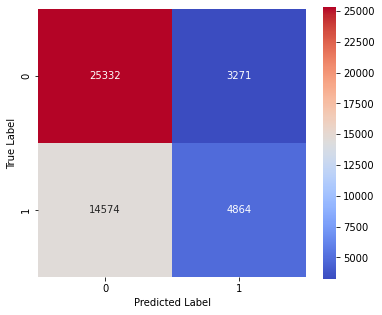

              precision    recall  f1-score   support

           0       0.63      0.89      0.74     28603
           1       0.60      0.25      0.35     19438

    accuracy                           0.63     48041
   macro avg       0.62      0.57      0.55     48041
weighted avg       0.62      0.63      0.58     48041



In [7]:
# Linear Discriminant Analysis

LDA = LinearDiscriminantAnalysis()
lda_model =  LDA.fit(X_train, y_train)
lda_pred = lda_model.predict(X_train)
print(f'LDA Accuracy Performance on Train Data: {lda_model.score(X_train, y_train)}')

# create confusion matrix and classification report
fig, ax = plt.subplots(figsize=(6, 5))
mat = confusion_matrix(y_train, lda_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0, 1], yticklabels=[0, 1])
ax.set(xlabel='Predicted Label')
ax.set(ylabel='True Label')
plt.show()
print(classification_report(y_train, lda_pred))

QDA Accuracy Performance on Train Data: 0.4336087924897483


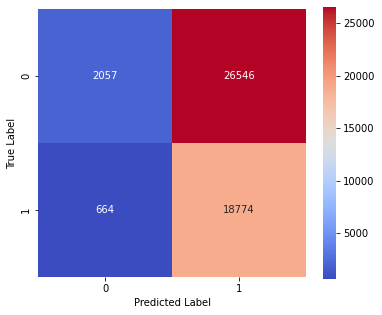

              precision    recall  f1-score   support

           0       0.76      0.07      0.13     28603
           1       0.41      0.97      0.58     19438

    accuracy                           0.43     48041
   macro avg       0.59      0.52      0.36     48041
weighted avg       0.62      0.43      0.31     48041



In [8]:
# Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()
qda_model =  QDA.fit(X_train, y_train)
qda_pred = qda_model.predict(X_train)
print(f'QDA Accuracy Performance on Train Data: {qda_model.score(X_train, y_train)}')

# create confusion matrix and classification report
fig, ax = plt.subplots(figsize=(6, 5))
mat = confusion_matrix(y_train, qda_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0, 1], yticklabels=[0, 1])
ax.set(xlabel='Predicted Label')
ax.set(ylabel='True Label')
plt.show()
print(classification_report(y_train, qda_pred))

## 3. Perform Test Validation of LDA and QDA Using Test Data

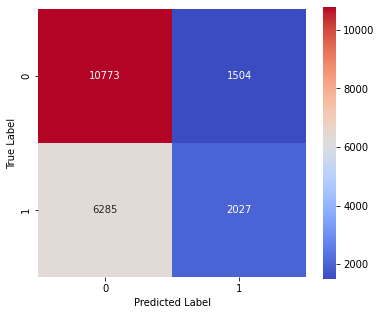

              precision    recall  f1-score   support

           0       0.63      0.88      0.73     12277
           1       0.57      0.24      0.34      8312

    accuracy                           0.62     20589
   macro avg       0.60      0.56      0.54     20589
weighted avg       0.61      0.62      0.58     20589



In [9]:
# Linear Discriminant Analysis

lda_pred = lda_model.predict(X_test)

# create confusion matrix and classification report
fig, ax = plt.subplots(figsize=(6, 5))
mat = confusion_matrix(y_test, lda_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0, 1], yticklabels=[0, 1])
ax.set(xlabel='Predicted Label')
ax.set(ylabel='True Label')
plt.show()
print(classification_report(y_test, lda_pred))

QDA Accuracy Performance on Test Data: 0.43430958278692505


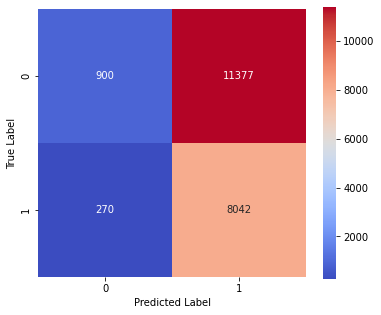

              precision    recall  f1-score   support

           0       0.77      0.07      0.13     12277
           1       0.41      0.97      0.58      8312

    accuracy                           0.43     20589
   macro avg       0.59      0.52      0.36     20589
weighted avg       0.63      0.43      0.31     20589



In [10]:
# Quadratic Discriminant Analysis

qda_pred = qda_model.predict(X_test)
print(f'QDA Accuracy Performance on Test Data: {qda_model.score(X_test, y_test)}')

# create confusion matrix and classification report
fig, ax = plt.subplots(figsize=(6, 5))
mat = confusion_matrix(y_test, qda_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0, 1], yticklabels=[0, 1])
ax.set(xlabel='Predicted Label')
ax.set(ylabel='True Label')
plt.show()
print(classification_report(y_test, qda_pred))

In [11]:
pct_overlap = (sum(lda_pred == qda_pred) / len(lda_pred) * 100).round(2)
pct_readmitted = np.float64((sum(y_test) / len(y_test)) * 100).round(2)
print(f'Percent of times LDA and QDA made the same prediction: {pct_overlap}% --- {sum(lda_pred == qda_pred)}')
print(f'Accuracy by predicting only majority class: {100 - pct_readmitted}%')

Percent of times LDA and QDA made the same prediction: 21.59% --- 4445
Accuracy by predicting only majority class: 59.63%


In [12]:
cnt = 0
for i in range(len(lda_pred)):
    if lda_pred[i] == qda_pred[i] and qda_pred[i] == y_test.iloc[i]:
        cnt += 1
pct_correct = np.float64((cnt / len(y_test)) * 100).round(2)
print(f'Total cases correctly predicted by LDA and QDA {pct_correct}% --- {cnt}')

Total cases correctly predicted by LDA and QDA 13.59% --- 2799


## 4. Results Summary

In both the training and testing data, LDA outperformed QDA. LDA overly favored the majority class (0 / not readmitted), while QDA overly favored the minority class (1 / readmitted). In both LDA and QDA, training and testing performance was very similar. LDA had a testing accuracy of 62% and and f-score of 0.34, while QDA had a testing accuracy of 43% and an f-score of 0.58 (due to the fact that QDA predicted 1 with higher score). Both models are poor predictors of readmittance when considering that exclusively predicting the majority class would yield an accuracy of 59.63%. 

LDA and QDA predicted different results in over 80% of cases in the testing data (they predicted the same results in 21.59% of the test data). Of the 4,445 overlapping predictions, only 2,799 were correct predictions. It is not suprising that the overlap in the 2 models is low, because as we could see from the confusion matrices, LDA and QDA picked predicted opposite classes the majority of the time. 

In [13]:
import datetime
import pytz

datetime.datetime.now(pytz.timezone('US/Central')).strftime("%a, %d %B %Y %H:%M:%S")

'Tue, 28 February 2023 19:27:56'